In [64]:
from thinkbayes2 import Suite, Joint, Pmf, Pdf, MakeNormalPmf, MakeJoint, MakeMixture
import thinkplot
import numpy as np
from scipy.special import gamma
from scipy.stats import norm

In [65]:
class RainfallPdf(Pdf):
    def __init__(self, k, theta):
        self.k = k
        self.theta = theta
        
    def Density(self, x):
        return (x ** (self.k - 1)) * np.exp(-x / self.theta) / (gamma(self.k) * (self.theta ** self.k))

#### Problem 1

In [66]:
rainfall = RainfallPdf(k=3, theta=2)
rainfall.Density(x=2)

0.09196986029286058

#### Problem 2

In [67]:
class Rainfall(Suite, Joint):
    def Likelihood(self, data, hypo):
        k, theta = hypo
        rainfall = RainfallPdf(k=k, theta=theta)
        return rainfall.Density(data)

In [68]:
ks = np.linspace(0.1, 2, 101)
thetas = np.linspace(0.1, 12, 101)

k_prior = Pmf(dict(zip(ks, norm(0, 0.5).pdf(ks))))
theta_prior = Pmf(dict(zip(thetas, norm(0, 4).pdf(thetas))))

suite = Rainfall(MakeJoint(k_prior, theta_prior))
suite.UpdateSet([0.78, 0.87, 0.64])

print('k Posterior Mean:', suite.Marginal(0).Mean())
print('theta Posterior Mean:', suite.Marginal(1).Mean())

k Posterior Mean: 0.648610932627643
theta Posterior Mean: 2.475030078710288


#### Problem 3

In [80]:
metapmf = Pmf()

for hypo, prob in suite.Items():
    k, theta = hypo
    pdf = RainfallPdf(k=k, theta=theta)
    values = np.linspace(0.01, 3, 101)
    pmf = Pmf(dict(zip(values, pdf.Density(values))))
    metapmf[pmf] = prob

print(metapmf)
    
prediction = MakeMixture(metapmf)
print(prediction.Mean())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



0.7435687311183706


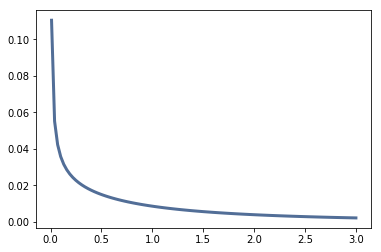

In [81]:
thinkplot.Pdf(prediction)